# Week 08 Homework - Kendall Gilbert

### 8.1

Last week you practiced single band raster calculations using Sentinel-2 satellite remote sensing data. This week you will practice working with the multiple bands associated with Sentinel-2 data in order to create RGB composites and other band manipulations. 

The Sentinel-2 bands are as follows:

![_._](img/sentinel-2-bands.jpg)

You will compare RGB and NDVI images from May 2018 (```data/pre-woolsey-fire/```) and February 2019 (```data/post-woolsey-fire```) over the Santa Monica Mountains which correspond to pre and post-Woolsey fire. The Woolsey fire occured in November 2018. 

In [1]:
#Import packages
import os
from glob import glob

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rxr

1. Create an **automated workflow** which loads, stacks and cleans the bands of a single Sentinel-2 date. 

In [2]:
# Create the path to post fire data
sat_post_fire_path = os.path.join("data","post-woolsey-fire")

# Generate a list of tiff files in post fire data
post_fire_paths = glob(os.path.join(sat_post_fire_path,"*B*.tiff"))

# Sort the post fire data
post_fire_paths.sort()

In [3]:
#Define a function to open cleaned bands of sattelite image data
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An single xarray object with the Landsat band data.

    """
     
    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [4]:
#Open all post fire bands cleaned
post_all_bands = []
for i, aband in enumerate(post_fire_paths):
    cleaned = open_clean_bands(aband)
    cleaned["band"] = i+1
    post_all_bands.append(cleaned)
    
#Stack the data
post_fire_stack = xr.concat(post_all_bands, dim="band")
post_fire_stack

<xarray.DataArray (band: 12, y: 337, x: 625)>
array([[[ 0.,  2.,  8., ..., 37., 30., 34.],
        [ 3.,  8.,  7., ..., 46., 26., 31.],
        [10.,  8.,  8., ..., 44., 22., 19.],
        ...,
        [ 0.,  0.,  0., ..., 13., 15., 21.],
        [ 0.,  0.,  0., ..., 15., 17., 18.],
        [ 0.,  0.,  0., ..., 16., 15., 17.]],

       [[ 4.,  6., 15., ..., 43., 37., 41.],
        [ 6., 14., 14., ..., 61., 33., 44.],
        [18., 14., 13., ..., 54., 28., 26.],
        ...,
        [ 1.,  1.,  1., ..., 18., 20., 31.],
        [ 1.,  1.,  1., ..., 18., 20., 25.],
        [ 1.,  1.,  1., ..., 22., 17., 23.]],

       [[10., 12., 23., ..., 46., 41., 46.],
        [12., 22., 22., ..., 67., 36., 45.],
        [27., 22., 22., ..., 59., 32., 30.],
        ...,
...
        ...,
        [ 0.,  0.,  0., ..., 36., 40., 43.],
        [ 0.,  0.,  0., ..., 37., 40., 47.],
        [ 0.,  0.,  0., ..., 42., 35., 36.]],

       [[29., 35., 65., ..., 48., 48., 49.],
        [37., 65., 63., ..., 53., 38., 35.],
        [73., 64., 62., ..., 51., 44., 44.],
        ...,
        [ 0.,  0.,  0., ..., 30., 34., 33.],
        [ 0.,  0.,  0., ..., 32., 34., 41.],
        [ 0.,  0.,  0., ..., 36., 29., 30.]],

       [[69., 68., 61., ..., 47., 46., 53.],
        [68., 59., 63., ..., 72., 42., 45.],
        [62., 61., 63., ..., 67., 41., 46.],
        ...,
        [ 0.,  0.,  0., ..., 42., 46., 52.],
        [ 0.,  0.,  0., ..., 44., 52., 50.],
        [ 0.,  0.,  0., ..., 48., 44., 41.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * x            (x) float64 -119.1 -119.1 -119.1 ... -118.5 -118.5 -118.5
  * y            (y) float64 34.27 34.27 34.27 34.27 ... 34.0 34.0 34.0 34.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

2. Run this workflow for both dates: pre and post Woolsey fire.

    The workflow was already run for the post fire data, so complete the workflow again for pre fire data.

In [14]:
# Create the path to pre fire data
sat_pre_fire_path = os.path.join("data","pre-woolsey-fire")

# Generate a list of tiff files in post fire data
pre_fire_paths = glob(os.path.join(sat_pre_fire_path,"*B*.tiff"))

# Sort the pre fire data
pre_fire_paths.sort()

In [15]:
#Open all pre fire bands cleaned
pre_all_bands = []
for i, aband in enumerate(pre_fire_paths):
    cleaned = open_clean_bands(aband)
    cleaned["band"] = i+1
    pre_all_bands.append(cleaned)
    
#Stack the data
pre_fire_stack = xr.concat(pre_all_bands, dim="band")
pre_fire_stack

<xarray.DataArray (band: 12, y: 337, x: 625)>
array([[[ 13.,  16.,  20., ...,  47.,  43.,  57.],
        [ 16.,  19.,  15., ...,  58.,  36.,  49.],
        [ 20.,  19.,  13., ...,  54.,  30.,  37.],
        ...,
        [ 12.,  12.,  12., ...,  23.,  24.,  27.],
        [ 12.,  11.,  12., ...,  27.,  27.,  26.],
        [ 12.,  12.,  12., ...,  24.,  24.,  27.]],

       [[ 18.,  20.,  25., ...,  58.,  47.,  63.],
        [ 21.,  24.,  17., ...,  76.,  40.,  53.],
        [ 26.,  24.,  16., ...,  65.,  34.,  35.],
        ...,
        [ 12.,  12.,  12., ...,  26.,  31.,  34.],
        [ 12.,  12.,  12., ...,  31.,  31.,  32.],
        [ 13.,  12.,  12., ...,  29.,  26.,  32.]],

       [[ 27.,  29.,  31., ...,  61.,  50.,  66.],
        [ 30.,  29.,  20., ...,  82.,  42.,  55.],
        [ 33.,  30.,  18., ...,  71.,  38.,  40.],
        ...,
...
        ...,
        [  7.,   7.,   7., ...,  51.,  58.,  59.],
        [  7.,   7.,   7., ...,  57.,  59.,  63.],
        [  8.,   7.,   7., ...,  56.,  53.,  52.]],

       [[ 60.,  66.,  98., ...,  80.,  50.,  61.],
        [ 71.,  93.,  55., ...,  74.,  47.,  51.],
        [ 96.,  97.,  45., ...,  66.,  52.,  56.],
        ...,
        [  7.,   7.,   7., ...,  44.,  50.,  47.],
        [  7.,   6.,   7., ...,  51.,  52.,  56.],
        [  7.,   7.,   6., ...,  48.,  45.,  44.]],

       [[ 95.,  89.,  59., ...,  63.,  63.,  84.],
        [ 91.,  62.,  36., ...,  91.,  51.,  65.],
        [ 69.,  61.,  32., ...,  77.,  51.,  69.],
        ...,
        [  8.,   8.,   8., ...,  55.,  62.,  70.],
        [  8.,   7.,   8., ...,  60.,  64.,  63.],
        [  8.,   7.,   7., ...,  63.,  60.,  55.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * x            (x) float64 -119.1 -119.1 -119.1 ... -118.5 -118.5 -118.5
  * y            (y) float64 34.27 34.27 34.27 34.27 ... 34.0 34.0 34.0 34.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

3. Map the RGB composites for both dates.

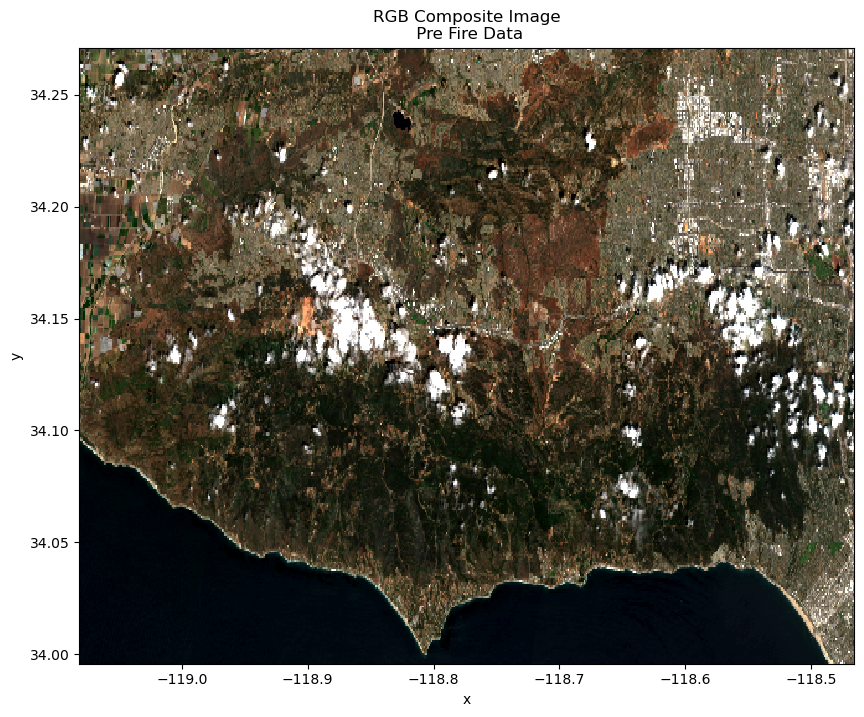

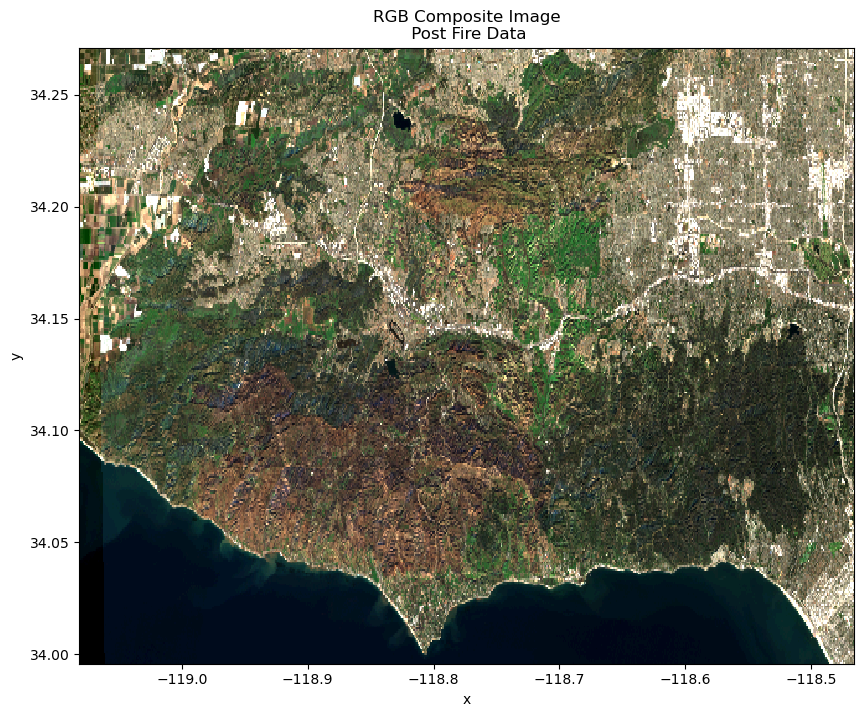

In [16]:
pre_rgb = (pre_fire_stack[[3,2,1],:,:])
post_rgb = (post_fire_stack[[3,2,1],:,:])

pre_rgb.astype("int").plot.imshow(rgb="band",robust=True, figsize=(10, 8))
plt.title("RGB Composite Image\n Pre Fire Data")
plt.show()

post_rgb.astype("int").plot.imshow(rgb="band",robust=True, figsize=(10, 8))
plt.title("RGB Composite Image\n Post Fire Data")
plt.show()

4. Calculate the NDVI and map both dates.

In [8]:
#Select the NIR and red bands from pre and post fire stacks
NIR_pre = (pre_fire_stack[7])
red_pre = (pre_fire_stack[3])
NIR_post = (post_fire_stack[7])
red_post = (post_fire_stack[3])

#Use the equation to calculate NDVI = (NIRBands - redBands)/(NIRBands + redBands) for pre and post fire
NDVI_pre = (NIR_pre-red_pre)/(NIR_pre+red_pre)
NDVI_post = (NIR_post-red_post)/(NIR_post+red_post)

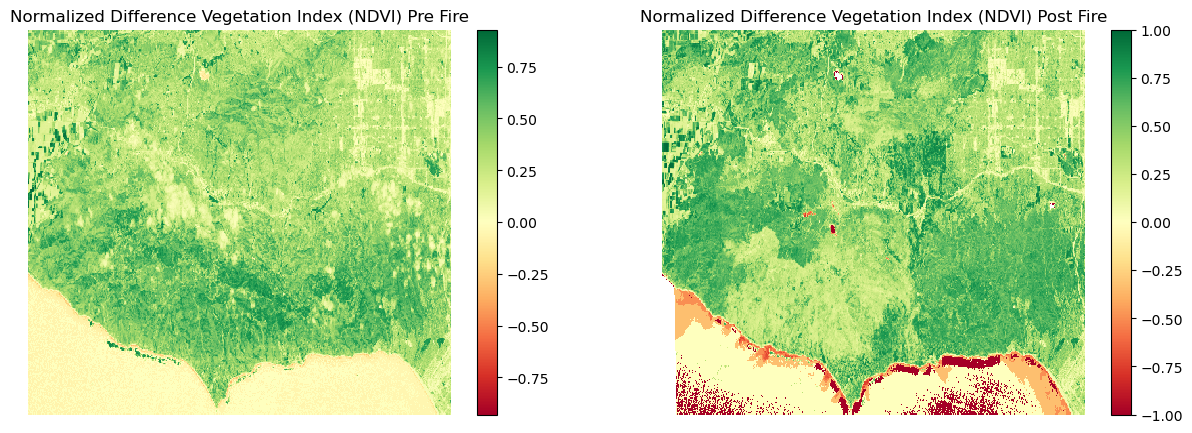

In [9]:
#Plot the NDVI data
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))
#Select the desired colormap
NDVI_pre.plot(cmap="RdYlGn",ax=ax1)
NDVI_post.plot(cmap="RdYlGn",ax=ax2)
ax1.set(title="Normalized Difference Vegetation Index (NDVI) Pre Fire")
ax1.set_axis_off()
ax2.set(title="Normalized Difference Vegetation Index (NDVI) Post Fire")
ax2.set_axis_off()
plt.show()

5. Write a few sentences of what differences you see between the RGB/NDVI maps. 

The pre fire RGB composite image shows a very dark and brown/red tinged landscape with several patches of white. On the other hand, the post fire RGB composite image shows a greener image with blues on the water. There is a browner path on the lower right land area, and towards the upper middle. 

The NDVI image post fire has significantly less high vegetation in the lower right portion of the land than the pre fire. Although the post fire image shows denser high vegetation to both the left and right of the newer barren portion in this lower section of the map. THe NDVI image post fire also seems to show more patches of higher vegetation in the upper right than the pre fire NDVI image.